In [1]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Get dataset from folder
dataset_root = 'datasets/nsl-kdd'
train_file = os.path.join(dataset_root, 'KDDTrain+.txt')
test_file = os.path.join(dataset_root, 'KDDTest+.txt')
#Get attributes/features/column names
header_names = ['duration', 'protocol_type', 'service', 'flag', 
                'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
                'urgent', 'hot', 'num_failed_logins', 'logged_in',
                'num_compromised', 'root_shell', 'su_attempted', 
                'num_root', 'num_file_creations', 'num_shells', 
                'num_access_files', 'num_outbound_cmds', 
                'is_host_login', 'is_guest_login', 'count', 
                'srv_count', 'serror_rate', 'srv_serror_rate', 
                'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
                'diff_srv_rate', 'srv_diff_host_rate', 
                'dst_host_count', 'dst_host_srv_count', 
                'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
                'dst_host_serror_rate', 'dst_host_srv_serror_rate', 
                'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 
                'attack_type', 'success_pred']
col_names = np.array(header_names)

#Nomidal indexes for column names
nominal_idx = [1, 2, 3]

#Binary indexes for columns with binary val
binary_idx = [6, 11, 13, 14, 20, 21]

#Creates a set of 1-41 then removes instances which are in nominalidx and binary idx

numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

#Take columns with nominal values and put into list
nominal_cols = col_names[nominal_idx].tolist()

#Take columns with binary values and put into list
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

#Create instance of empty dictionary where the value is a list?
category = defaultdict(list)
category['benign'].append('normal')

with open('datasets/training_attack_types.txt', 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

default_category = "saint"

<Axes: >

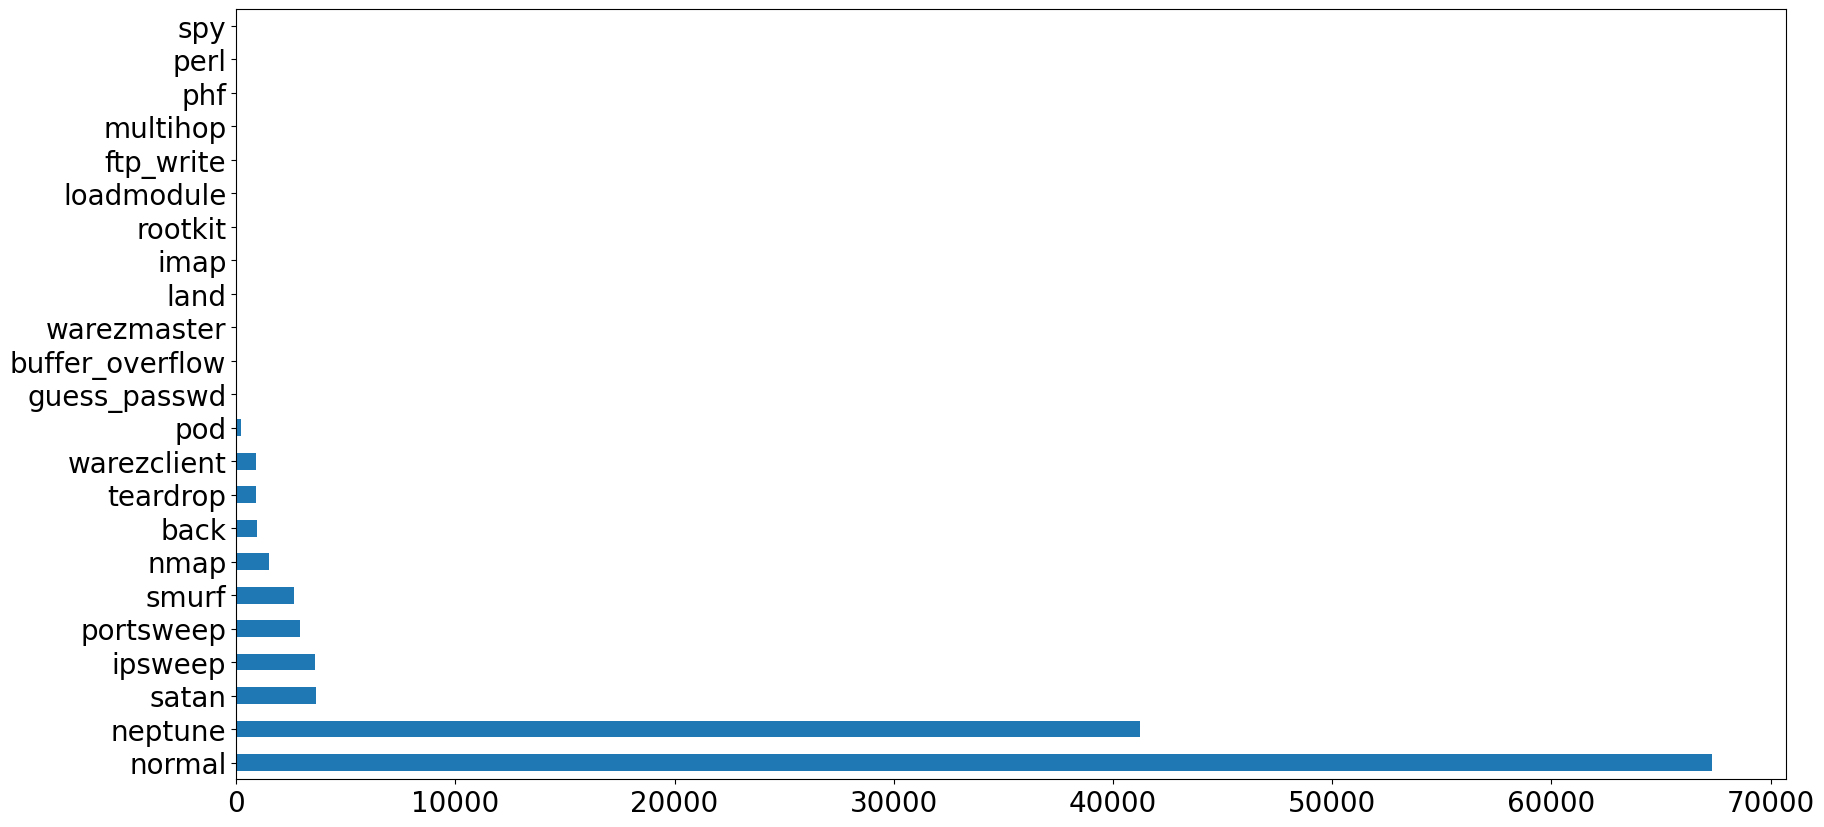

In [3]:
#Read training data and drop the unnecessary column
train_df = pd.read_csv(train_file, names=header_names)
train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
train_df.drop(['success_pred'], axis=1, inplace=True)

 #Read test data 
test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type']\
                                .map(lambda x: attack_mapping.get(x,default_category))
test_df.drop(['success_pred'], axis=1, inplace=True)
#All the different types of attacks
train_attack_types = train_df['attack_type'].value_counts()
#All attack categories
train_attack_cats = train_df['attack_category'].value_counts()
test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()
train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

In [4]:
#Print the different attack types in the dataset
print(train_attack_types)

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack_type, dtype: int64


<Axes: >

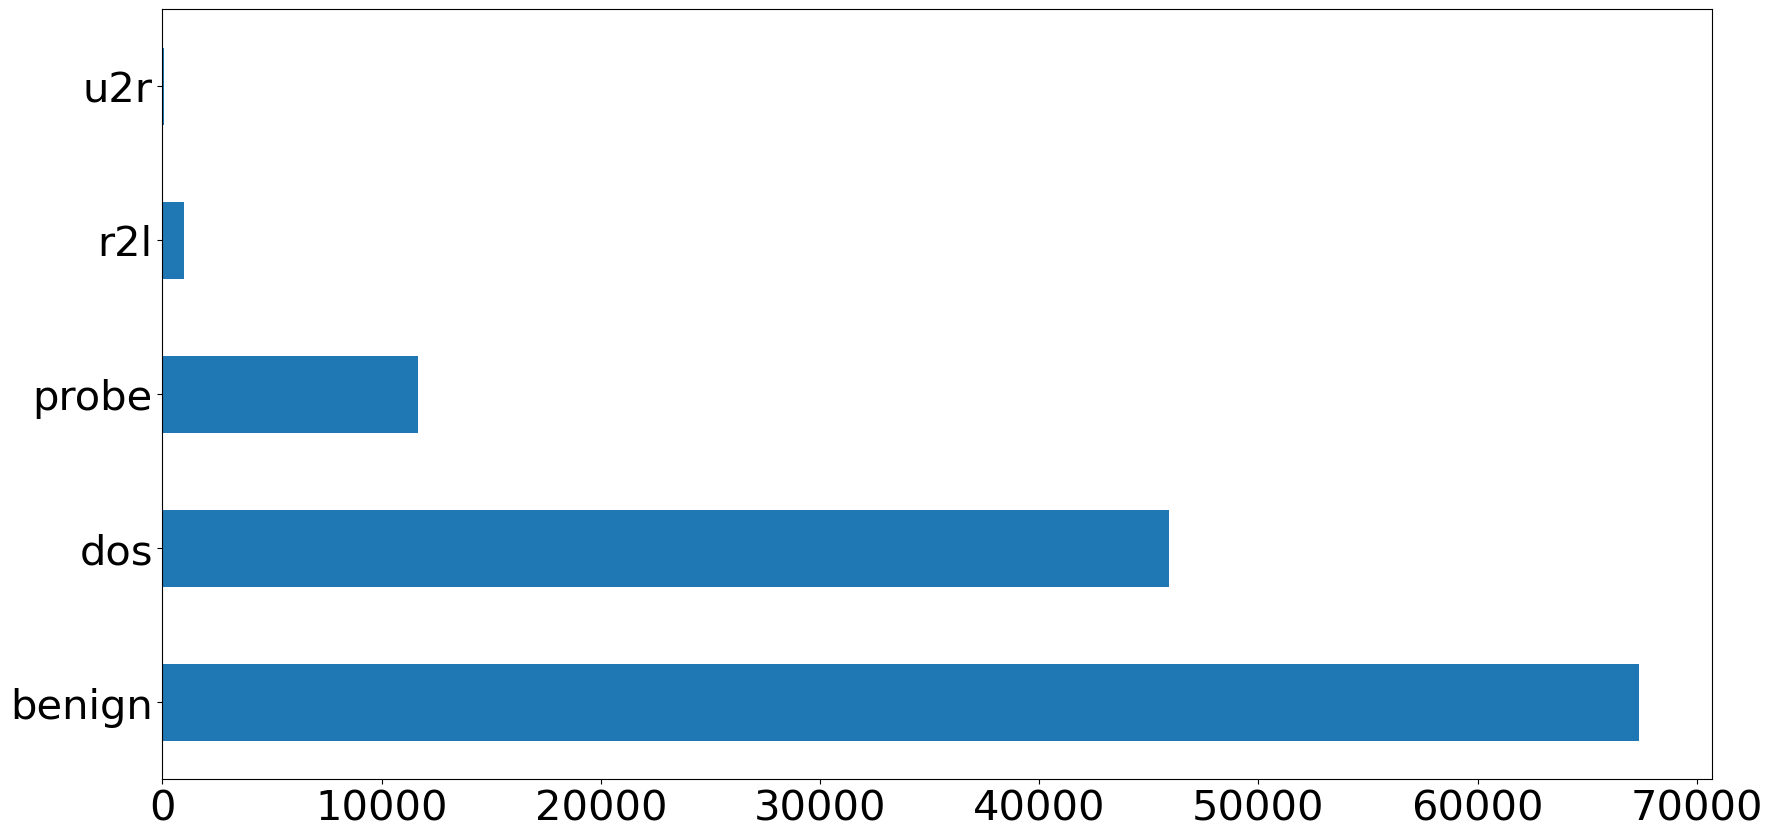

In [5]:
#Plot the attack catagories
train_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

In [6]:
train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)

In [7]:
#Combine the training data
combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))

In [8]:
print(train_x)

        duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0              0        491          0     0               0       0    0   
1              0        146          0     0               0       0    0   
2              0          0          0     0               0       0    0   
3              0        232       8153     0               0       0    0   
4              0        199        420     0               0       0    0   
...          ...        ...        ...   ...             ...     ...  ...   
125968         0          0          0     0               0       0    0   
125969         8        105        145     0               0       0    0   
125970         0       2231        384     0               0       0    0   
125971         0          0          0     0               0       0    0   
125972         0        151          0     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
0  

In [9]:
print(combined_df_raw)

       duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0             0           tcp  ftp_data   SF        491          0     0   
1             0           udp     other   SF        146          0     0   
2             0           tcp   private   S0          0          0     0   
3             0           tcp      http   SF        232       8153     0   
4             0           tcp      http   SF        199        420     0   
...         ...           ...       ...  ...        ...        ...   ...   
22539         0           tcp      smtp   SF        794        333     0   
22540         0           tcp      http   SF        317        938     0   
22541         0           tcp      http   SF      54540       8314     0   
22542         0           udp  domain_u   SF         42         42     0   
22543         0           tcp    sunrpc  REJ          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0       

In [10]:
from sklearn.preprocessing import StandardScaler

#Convert to array
durations = train_x['duration'].values.reshape(-1, 1)
#Scale from -1 to 1
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()


count    1.259730e+05
mean     2.549477e-17
std      1.000004e+00
min     -1.102492e-01
25%     -1.102492e-01
50%     -1.102492e-01
75%     -1.102492e-01
max      1.636428e+01
dtype: float64

In [11]:
#Scale all data from 0 to 1
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

count    125973.000000
mean          0.006692
std           0.060700
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
dtype: float64

In [12]:
#Ignores outliers in the dataset
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

count    125973.00000
mean        287.14465
std        2604.51531
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max       42908.00000
dtype: float64

In [13]:
standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    standard_scaler.transform(test_x[numeric_cols])

/var/folders/jf/mqbx9rpj7cz6qz4vjk7f1n4c0000gn/T/ipykernel_25973/853542073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x[numeric_cols] = \
/var/folders/jf/mqbx9rpj7cz6qz4vjk7f1n4c0000gn/T/ipykernel_25973/853542073.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x[numeric_cols] = \


In [19]:
#Train descision tree on the data

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(train_x, train_Y)
pred_y = classifier.predict(test_x)
error = zero_one_loss(test_Y, pred_y)

In [20]:

print(error)

0.28907913413768627


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(test_Y, pred_y)))
print('Precision score: {}'.format(precision_score(test_Y, pred_y,average = "micro")))
print('Recall score: {}'.format(recall_score(test_Y, pred_y,average = "micro")))
print('F1 score: {}'.format(f1_score(test_Y, pred_y,average = "micro")))


Accuracy score: 0.7109208658623137
Precision score: 0.7109208658623137
Recall score: 0.7109208658623137
F1 score: 0.7109208658623137


In [32]:
mccm = metrics.confusion_matrix(test_Y, pred_y)

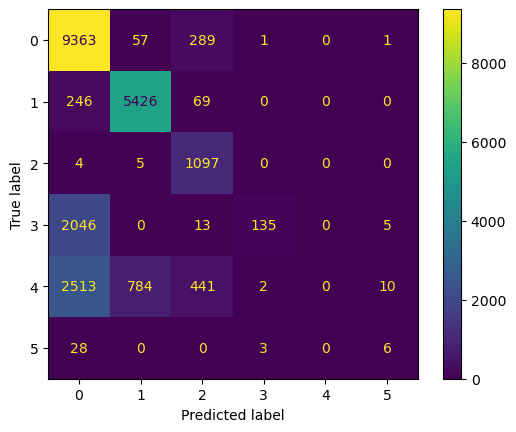

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = mccm)
disp.plot()
plt.show()

In [38]:
print(train_df['attack_category'])

0         benign
1         benign
2            dos
3         benign
4         benign
           ...  
125968       dos
125969    benign
125970    benign
125971       dos
125972    benign
Name: attack_category, Length: 125973, dtype: object


In [41]:
cats = train_df['attack_category'].unique()

In [43]:
#Find how many of each category of attacks are in the dataset
cat_dict = {"benign" : 0,
            "dos" : 0,
            "r2l":0,
            "probe":0,
            "u2r":0

}
for cat in train_df['attack_category']:
    for category in cats:
        if cat == category:
            cat_dict[category]+=1
print(cat_dict)


{'benign': 67343, 'dos': 45927, 'r2l': 995, 'probe': 11656, 'u2r': 52}
